In [1]:
#Exercício 1.1
# Declaramos a função f(x)=x^2-10
function f(x)
    return x^2-10
end
# O algoritmo calcula, pelo metodo da bisseção, a solução para equação x^2 - 10 = 0, no Intervalo [0,20].
# O parâmetro é o erro máximo
function bi(erro)
    menor = 0
    maior = 20
    x=0.0
    k=0
    while(abs(maior-menor)>erro)
        x=(maior+menor)/
        2
        if(f(x)<0)
            menor=x
        else
            maior=x
        end
        k+=1
    end
    return x, k
end
# Retorna o primeiro valor encontrado para um erro menor que o da entrada
# e o número de iterações realizadas pela função

bi (generic function with 1 method)

In [2]:
bi(10^-8)

(3.162277666851878, 31)

In [3]:
#Exercicio 1.2
#Definimos a função e sua derivada
function f(x)
    return x^5 - 3125
end
function df(x)
    return 5x^4
end
# Utilizando o video do Abel como fonte, foi possivel montar o seguinte algoritmo.
# Função que executa o metodo da bisseção
# Recebe o erro como parametro e retorna um valor aproximado
function bissecao(erro)
    #Intervalo [-100,100]
    menor = -100 
    maior = 100 
    x = 0.0
    while(abs(f(x)) >= erro)
        x = (menor + maior)/2
        if(f(menor)*f(x) < 0)
            maior= x
        elseif(f(x)*f(maior) < 0)
            menor = x
        end
    end
    return x
end

bissecao (generic function with 1 method)

In [4]:
# Função que executa o metodo da Newton
# Recebe como parametro o "chute" inicial e o numero maximo de iterações
# Retorna uma raiz de função, caso não encontre a raiz a função retorna nada e faz um print que não achou o zero.
function newton(aproximacao, max_iter)
    aux = 10^-2 #Ajuda a achar a raiz
    it = 0
    for i in 1:max_iter
        #Precisa checar se a dervida é zero ou proxima de zero ja que será usada para dividir f(x)
        if(abs(df(aproximacao)) < 10^-2)
            print("Derivada nula\n")
            break
        end
        aux = aproximacao
        #print(aux)
        aproximacao = aproximacao - f(aproximacao)/df(aproximacao)
        #print(aproximacao)
        #Caso ja tenha encontrado a raiz encerra o loop
        if(aproximacao == aux)
            break
        end
    end
    #Caso tenha feito todas as interações e não achou  a raiz printa a mensagem
    if(aproximacao != aux)
        print("Não achou o zero\n")
        return 
    else
        return aproximacao
    end
end

newton (generic function with 1 method)

In [5]:
newton(bissecao(10^-2), 2)

Não achou o zero


In [6]:
newton(bissecao(10^-2), 5)

5.0

In [1]:
#Exercicio 1.3
function interpolação(x,y)
    #criar a matriz V
    V=[x.^0 x.^1 x.^2]
    #c=inv(V)*y #LENTO!!!!!!!!!!!!!!!!!!!!
    c=V\y #resolver o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolação (generic function with 1 method)

In [12]:
x = [1,2.718281828,4.48168907]
y = [0,1,3/2]
interpolação(x,y)

3-element Vector{Float64}:
 -0.8149755905062174
  0.9006910895694049
 -0.08571549906318753

In [14]:
-0.8149755905062174 + 0.9006910895694049*3  -0.08571549906318753*9

1.1156581866333097

In [16]:
((3 - 1)*(3-2.718281828)*(3-4.48168907))/6

-0.1391395787575934

In [7]:
#Exercicio 1.4
function interpolação(x,y)
    #criar a matriz V
    V=[x.^0 x.^1 x.^2]
    #c=inv(V)*y #LENTO!!!!!!!!!!!!!!!!!!!!
    c=V\y #resolver o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolação (generic function with 1 method)

In [9]:
x=[pi/6; pi/4; pi/3]
y=[sqrt(3)/2; sqrt(2)/2; sqrt(1)/2]
c=interpolação(x,y)

3-element Vector{Float64}:
  1.0392981732142508
 -0.14686140578658105
 -0.3515386511338111

In [10]:
1.0392981732142508 + -0.14686140578658105(0.698132) + -0.3515386511338111(0.698132)^2

0.7654337044271249

In [11]:
#Exercicio 1.5
function interpolação(x,y)
    #criar a matriz V
    V=[x.^0 x.^1 x.^2]
    #c=inv(V)*y #LENTO!!!!!!!!!!!!!!!!!!!!
    c=V\y #resolver o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolação (generic function with 1 method)

In [12]:
tempo=[0; 90; 150]
temperatura=[34; 30; 25]
r=interpolação(tempo,temperatura)

3-element Vector{Float64}:
 34.0
 -0.0211111111111111
 -0.0002592592592592593

In [13]:
p(x)=34-0.0211111111111111*x -0.0002592592592592593*x^2

p (generic function with 1 method)

In [14]:
-0.0002592592592592593*2

-0.0005185185185185186

In [15]:
#f'(x)=0
-0.0211111111111111/0.0005185185185185186

-40.71428571428569

In [16]:
#Valor maximo
p(-40.71428571428569)

34.429761904761904

In [17]:
#Exercicio 1.7
#Definimos os pontos
x=[-1; 3; 5; 7; 8] # Precisa estar em ordem crescente
y=[1; 7; 2; 5; 2]
#Função recebe um conjunto de 5 pontos e retorna os 8 coeficientes para montarmos os polinomios  de grau 3
function interpolação(x,y)
    P=[x[1];x[2];x[3]]
    Q=[x[3];x[4];x[5]]
    Yp=[y[1];y[2];y[3];0]
    Yq=[y[3];y[4];y[5];0]
    #Para evitar "picos" no desenho definimos P'(x3) = 0
    derivada_p=[0, 1, 2x[3],3x[3]^2]
    d_p=derivada_p'
    A=[P.^0 P.^1 P.^2 P.^3]
    a=vcat(A,d_p)
    #Para evitar "picos" no desenho definimos Q'(x3) = 0
    derivada_q=[0, 1, 2x[3],3x[3]^2]
    d_q=derivada_q'
    B=[Q.^0 Q.^1 Q.^2 Q.^3]
    b=vcat(B,d_q)
    c=a\Yp #resolver o sistema linear ac=Yp
    d=b\Yq #resolver o sistema linear bd=Yq
    return c,d
end

interpolação (generic function with 1 method)

In [18]:
c,d=interpolação(x,y)
P(x) = c[1]+c[2]x+c[3]x^2 + c[4]x^3
Q(x) = d[1]+d[2]x+d[3]x^2 + d[4]x^3


Q (generic function with 1 method)

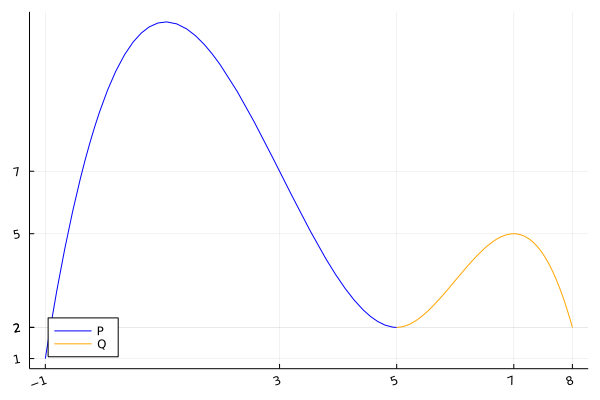

In [19]:
using Plots
gr(size=(600,400))
plot(P,x[1],x[3],label="P", c=:blue,
    grid=true,
    xaxis=(0,20),
    xticks=([x[1],x[2],x[3],x[4],x[5]]),
    yaxis=(0,10),
    yticks=([y[1],y[2],y[3],y[4],y[5]]))
plot!(Q,x[3],x[5],label="Q", c=:orange)
plot!(legend=:bottomleft)